In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from keras.layers import Dropout
import tensorflow as tf


C:\Users\rty67\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the dataset
data = pd.read_csv('BTCprice.csv')

In [3]:
# Extract the 'Close' prices as our target variable
target = data['Close'].values

In [4]:
# Normalize the data to scale between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
target = scaler.fit_transform(target.reshape(-1, 1))

In [5]:
# Split the data into training and testing sets
train_size = int(len(target) * 0.8)
test_size = len(target) - train_size
train_data, test_data = target[0:train_size,:], target[train_size:len(target),:]

In [6]:
# Prepare the data for LSTM
def create_sequences(dataset, seq_length):
    dataX, dataY = [], []
    for i in range(len(dataset) - seq_length):
        dataX.append(dataset[i:(i + seq_length)])
        dataY.append(dataset[i + seq_length])
    return np.array(dataX), np.array(dataY)

In [7]:
seq_length = 10  
trainX, trainY = create_sequences(train_data, seq_length)
testX, testY = create_sequences(test_data, seq_length)

In [8]:
#build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, target.shape[1])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [9]:
# Train the model
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
1450/1450 - 6s - loss: 0.0055 - 6s/epoch - 4ms/step
Epoch 2/100
1450/1450 - 4s - loss: 0.0031 - 4s/epoch - 3ms/step
Epoch 3/100
1450/1450 - 4s - loss: 0.0028 - 4s/epoch - 3ms/step
Epoch 4/100
1450/1450 - 4s - loss: 0.0021 - 4s/epoch - 3ms/step
Epoch 5/100
1450/1450 - 4s - loss: 0.0022 - 4s/epoch - 3ms/step
Epoch 6/100
1450/1450 - 4s - loss: 0.0018 - 4s/epoch - 3ms/step
Epoch 7/100
1450/1450 - 4s - loss: 0.0019 - 4s/epoch - 3ms/step
Epoch 8/100
1450/1450 - 4s - loss: 0.0019 - 4s/epoch - 3ms/step
Epoch 9/100
1450/1450 - 4s - loss: 0.0017 - 4s/epoch - 3ms/step
Epoch 10/100
1450/1450 - 4s - loss: 0.0016 - 4s/epoch - 3ms/step
Epoch 11/100
1450/1450 - 4s - loss: 0.0015 - 4s/epoch - 3ms/step
Epoch 12/100
1450/1450 - 4s - loss: 0.0017 - 4s/epoch - 3ms/step
Epoch 13/100
1450/1450 - 4s - loss: 0.0015 - 4s/epoch - 3ms/step
Epoch 14/100
1450/1450 - 4s - loss: 0.0014 - 4s/epoch - 3ms/step
Epoch 15/100
1450/1450 - 4s - loss: 0.0013 - 4s/epoch - 3ms/step
Epoch 16/100
1450/1450 - 4s - loss

In [10]:
# Make predictions on the test set (January 2023 to May 2023)
test_predictions = model.predict(testX)

12/12 [==============================] - 1s 2ms/step


In [11]:
# Inverse transform the predictions to get the original scale
test_predictions = scaler.inverse_transform(test_predictions)

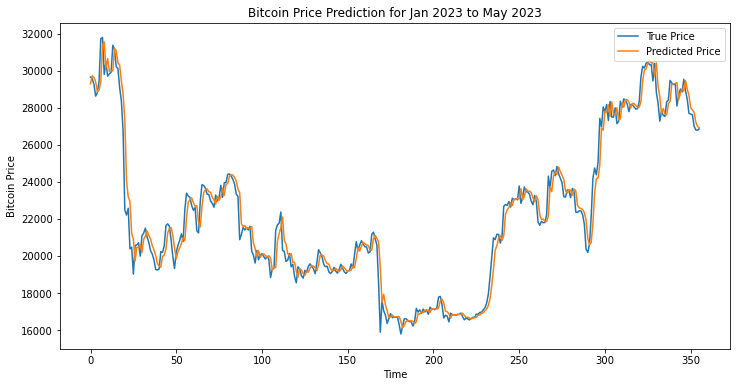

In [12]:
# Plot the results for the test set
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(testY), label='True Price')
plt.plot(test_predictions, label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.title('Bitcoin Price Prediction for Jan 2023 to May 2023')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# Inverse transform the true prices to their original scale
true_prices = scaler.inverse_transform(testY)

# Calculate the MAPE
mape = mean_absolute_percentage_error(true_prices, test_predictions)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(true_prices, test_predictions))

print(f"Root Mean Squared Error (RMSE): {rmse}")
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))

Root Mean Squared Error (RMSE): 751.1670619104656
Mean Absolute Percentage Error (MAPE): 0.02%
